In [1]:
%matplotlib inline

from PIL import Image

import cv2, matplotlib
import numpy as np

from math import sqrt

import matplotlib.pyplot as plt

from os.path import expanduser, splitext
from os import scandir, makedirs

import csv

from tqdm.notebook import trange, tqdm

from pathlib import Path

debug = False  # plot every steps

In [2]:
from floorplan_analysis import read_from_csv

# CSV

In [3]:
dir_from = "/data/fp_img_processed/"

csv_to = "size.csv"

### all of the plans
ID_path_dict = {splitext(f.name)[0]: f.path for f in scandir(dir_from) if f.is_file()}
print(len(ID_path_dict.keys()), "floorplans")

50412 floorplans


In [4]:
list(ID_path_dict.items())[:10]

[('3803_145', '/data/fp_img_processed/3803_145.png'),
 ('112076_61B1d', '/data/fp_img_processed/112076_61B1d.png'),
 ('1200_85A', '/data/fp_img_processed/1200_85A.png'),
 ('2604_104(동신)', '/data/fp_img_processed/2604_104(동신).png'),
 ('3039_154B', '/data/fp_img_processed/3039_154B.png'),
 ('100273_82', '/data/fp_img_processed/100273_82.png'),
 ('9155_149', '/data/fp_img_processed/9155_149.png'),
 ('19690_192', '/data/fp_img_processed/19690_192.png'),
 ('1912_71', '/data/fp_img_processed/1912_71.png'),
 ('105094_150', '/data/fp_img_processed/105094_150.png')]

In [5]:
with open(csv_to, "w", newline="", encoding="utf-8-sig") as csvfile:
    listwriter = csv.writer(csvfile)

    IDs_error = []
    for ID, path in tqdm(ID_path_dict.items(), desc="Processing plans"):
        try:
            with Image.open(path) as im:
                width, height = im.size
            listwriter.writerow([ID, width, height])
        except:
            IDs_error.append(ID)
    print(len(IDs_error))
    print(IDs_error)


0
[]


# analysis

In [6]:
import pandas as pd

df = pd.read_csv(csv_to, names=["ID", "width", "height"])
df = df.set_index("ID")

In [7]:
df

,width,height
ID,,
3803_145,62,64
112076_61B1d,36,48
1200_85A,38,55
2604_104(동신),50,63
3039_154B,75,57
...,...,...
12238_105B,55,83
103025_83A3,78,41
23002_108,43,74


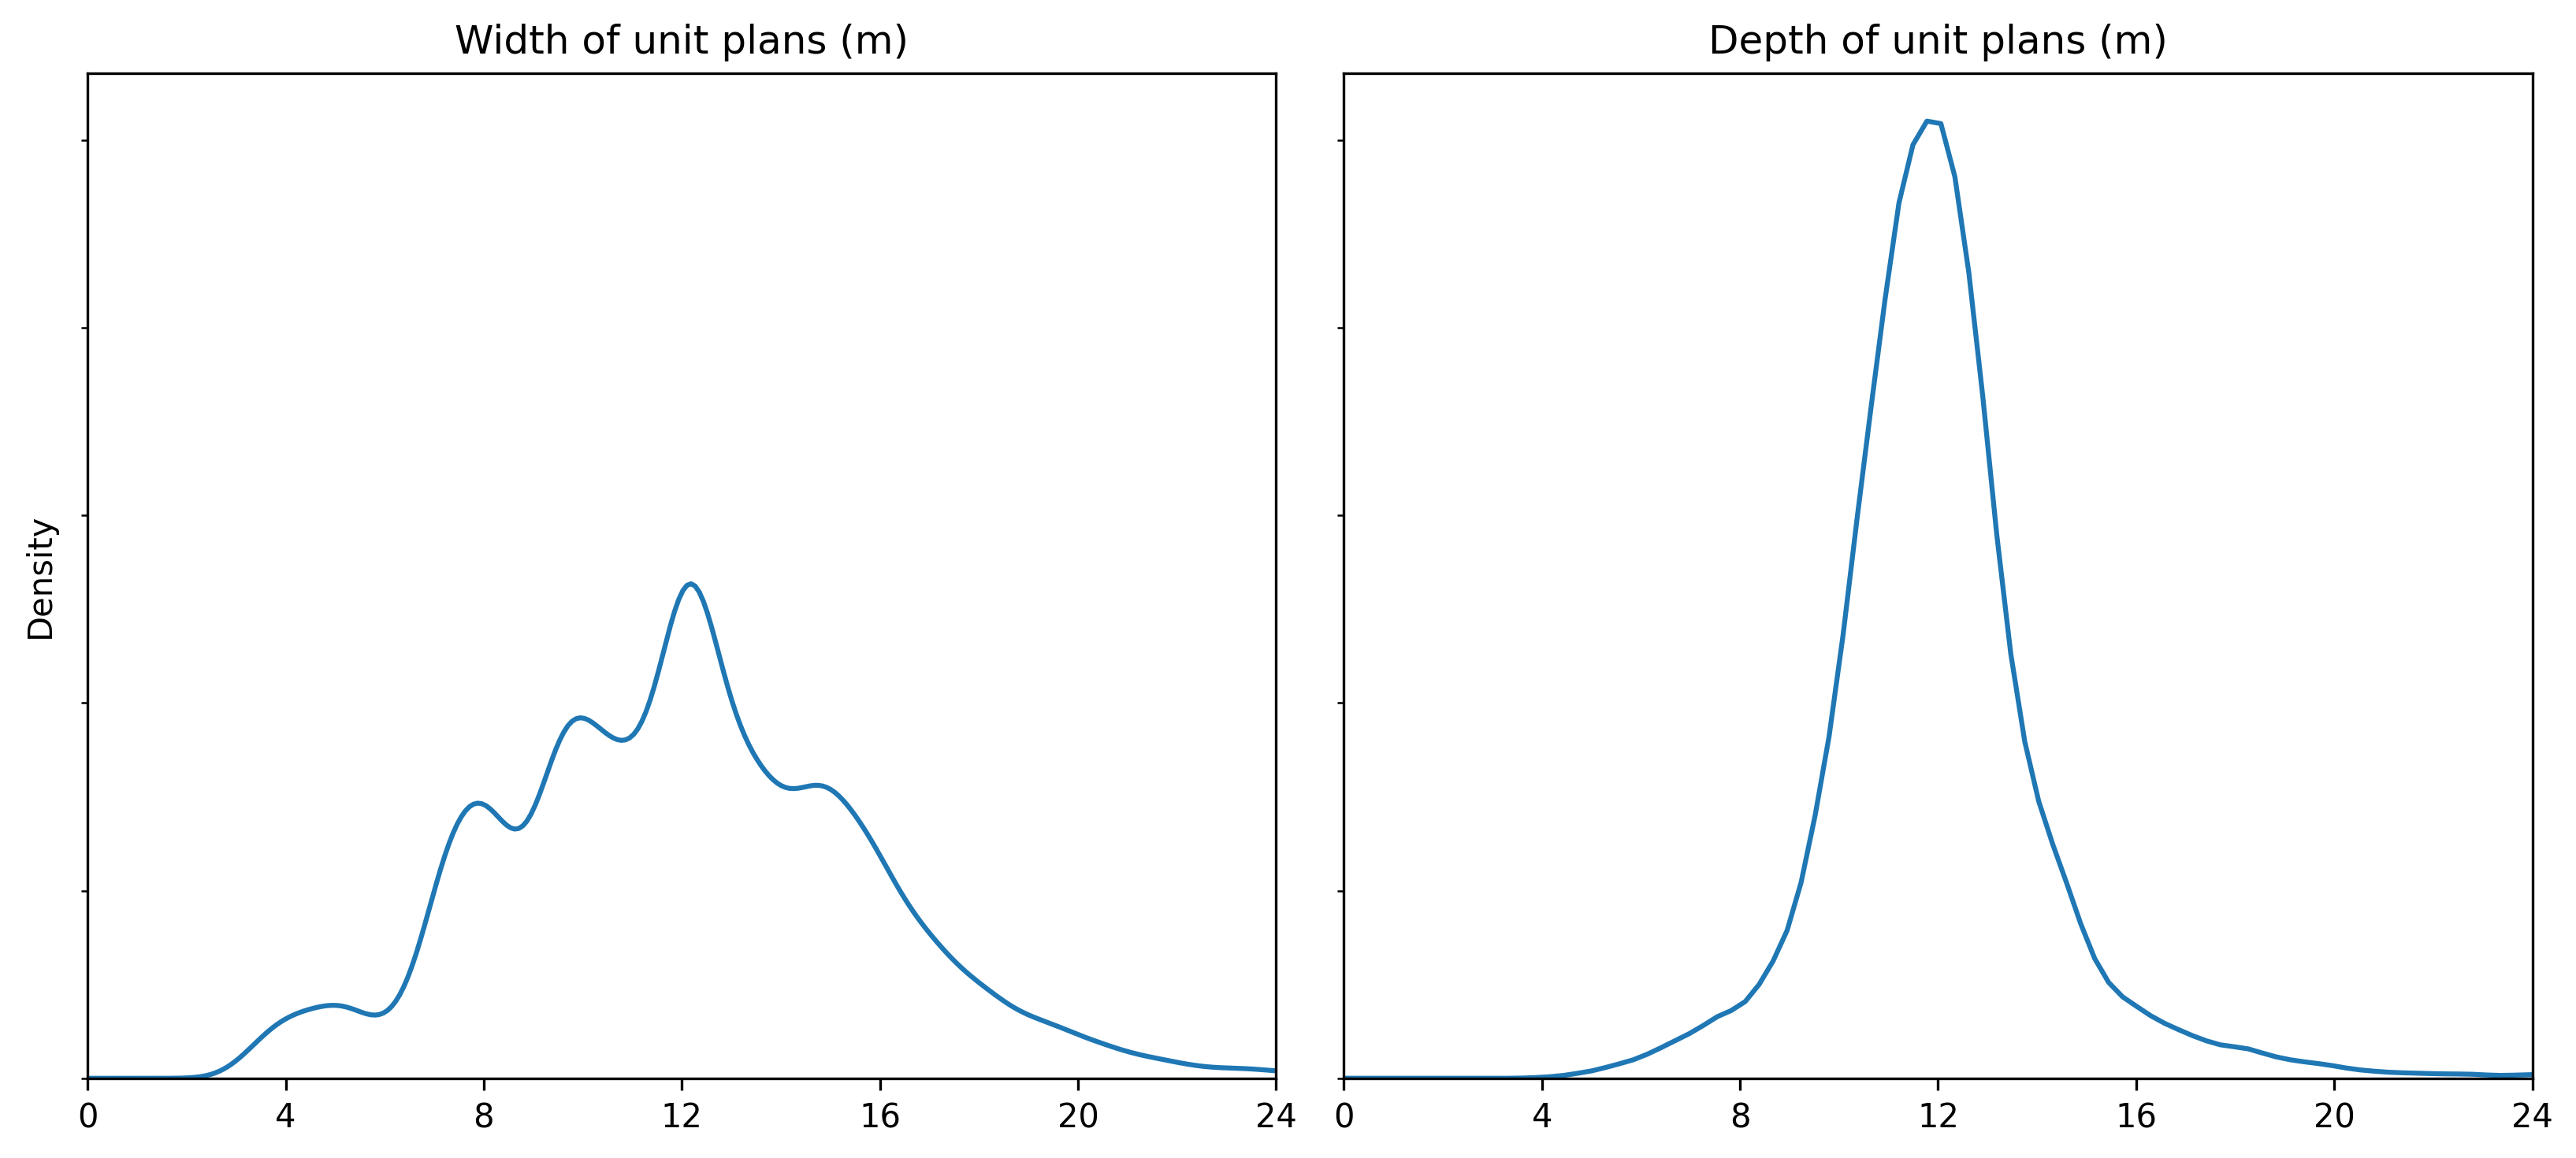

In [22]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(11, 5), dpi=300)

df.width.plot.kde(ax=axs[0])
axs[0].set_title("Width of unit plans (m)")

df.height.plot.kde(ax=axs[1])
axs[1].set_title("Depth of unit plans (m)")

for ax in axs:
    ax.set_xlim(0, 120)
    ax.set_xticks(range(0, 120+1, 20))
    ax.set_xticklabels(range(0, 24+1, 4))
    ax.set_ylim(0)
    ax.set_yticks([])

plt.tight_layout()
fig.savefig("fp_size_kde.pdf", bbox_inches="tight", pad_inches=0)